Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



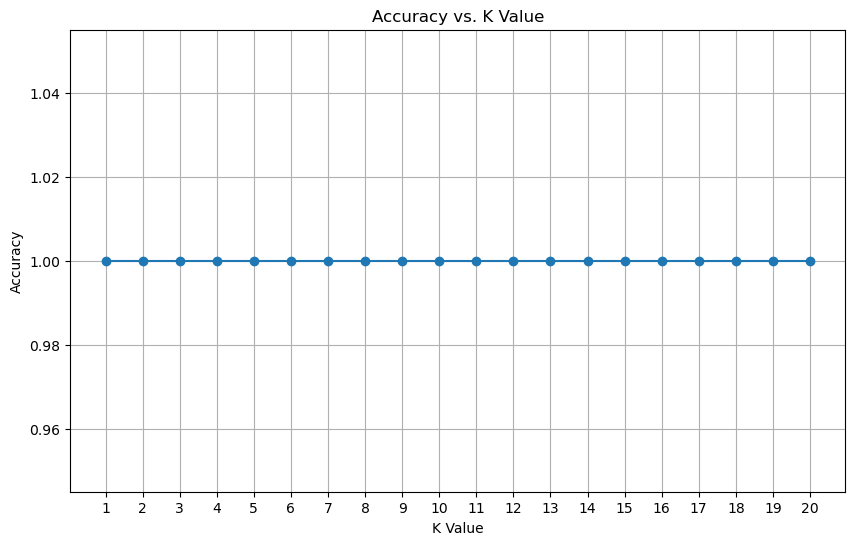

Best K: 1 with accuracy: 1.00


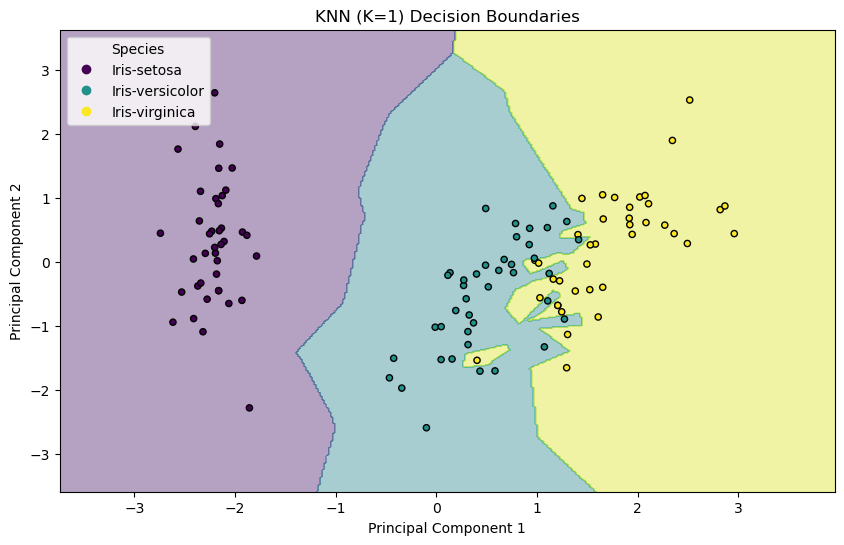

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load the dataset
iris = pd.read_csv('Iris.csv')

# Preprocessing
iris = iris.drop('Id', axis=1)  # Remove ID column
X = iris.iloc[:, :-1].values    # Features

# Convert string labels to numerical values
le = LabelEncoder()
y = le.fit_transform(iris.iloc[:, -1])  # Target as numerical values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Experiment with different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

# Plot accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with accuracy: {max(accuracies):.2f}")

# Visualize decision boundaries using PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_pca, y_train)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in mesh
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot training points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', s=20, edgecolor='k')
plt.title(f'KNN (K={best_k}) Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create legend with original class names
handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Species")
plt.show()